In [3]:
# Common Libraries
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [ ]:
# from google.colab import drive
# Load the dataset
# Load dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/insurance.csv')

# Check for null values
null_values = data.isnull().sum()

# Define results dictionary
results = {}
y = data.iloc[:, -1]
X = data.iloc[:, :-1]

print(data[:5])

# df.shape

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [8]:
# Data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define columns to be scaled and columns to be kept as is
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply preprocessing to the dataset
X_processed = preprocessor.fit_transform(X)

# Convert the processed data back to DataFrame
columns = numeric_features + preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features).tolist()
X_processed = pd.DataFrame(X_processed, columns=columns)

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.20, random_state=42)


In [9]:
# Visualizing the various features of Distribution
def plot_distribution(feature, xlabel):
    plt.figure(figsize=(15, 5))
    sns.barplot(x=X[feature].value_counts().index, y=X[feature].value_counts())
    plt.title(f'{xlabel} Distribution')
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.show()

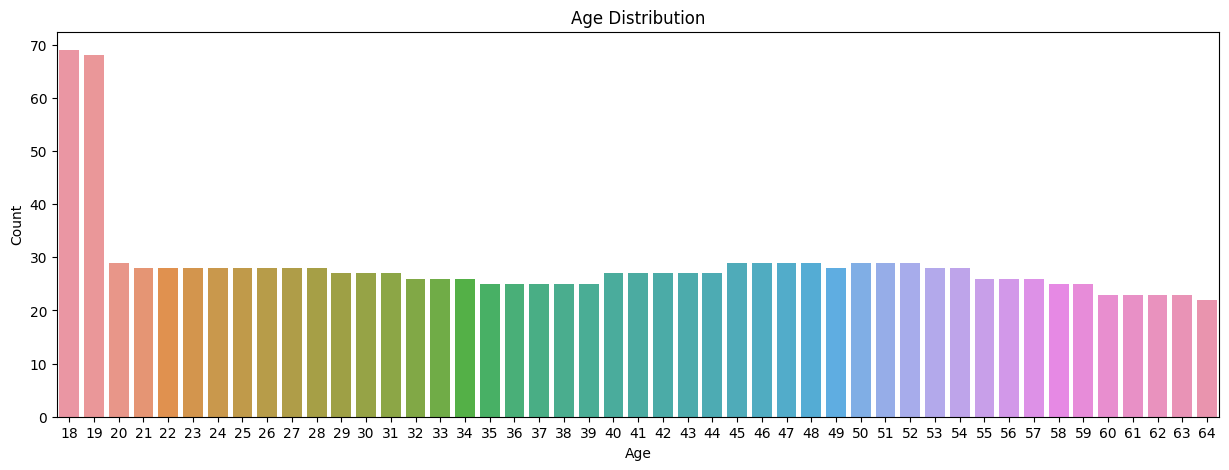

In [10]:
# Age Distribution
plot_distribution('age', 'Age')

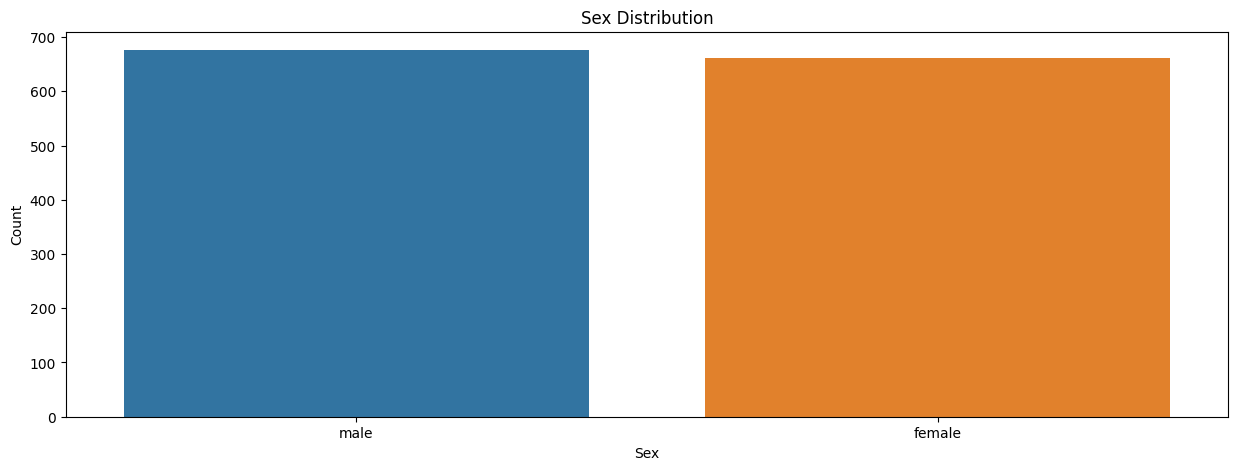

In [11]:
#Sex Distribution
plot_distribution('sex', 'Sex')

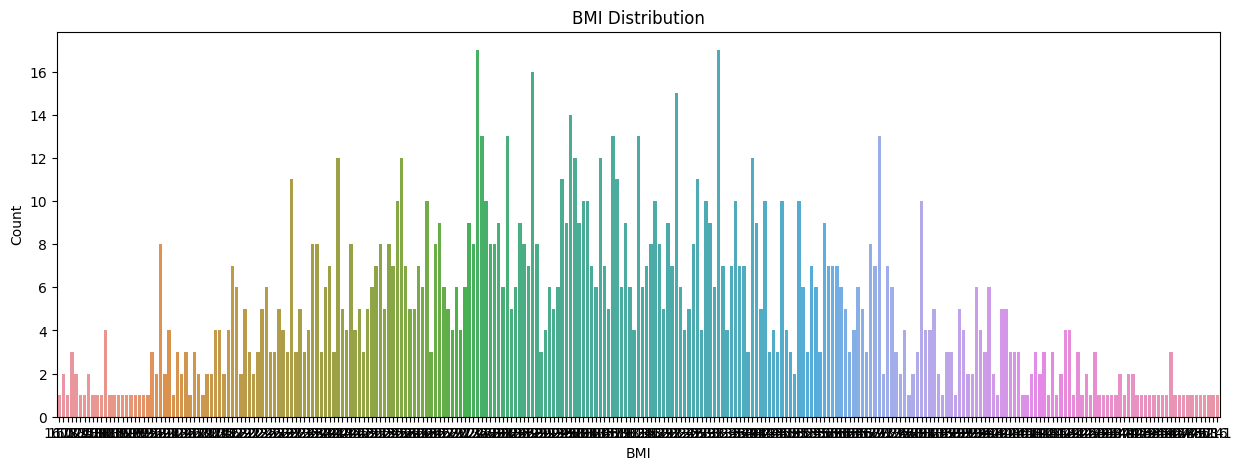

In [12]:
#BMI Distribution
plot_distribution('bmi', 'BMI')

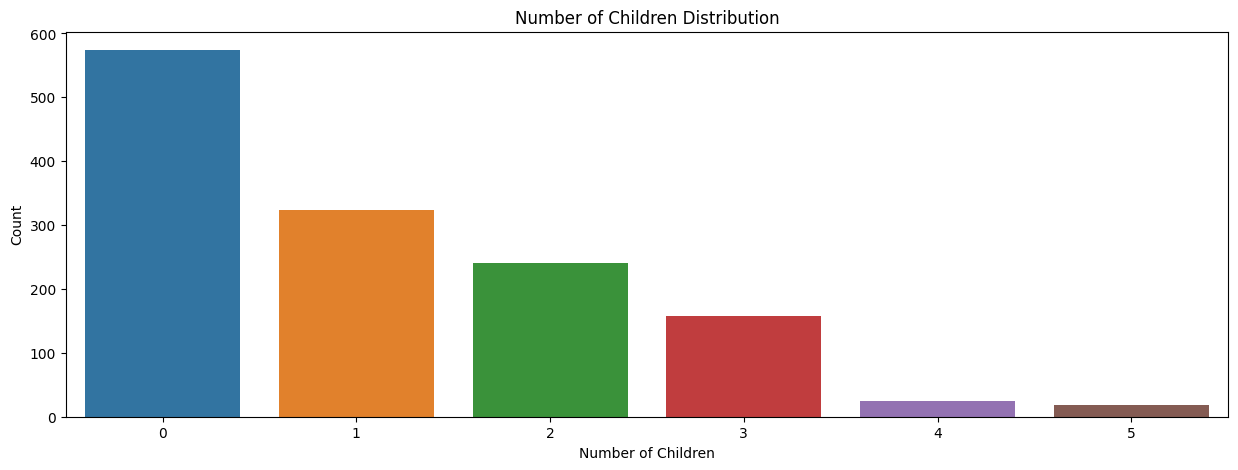

In [13]:
#Children Distribution
plot_distribution('children', 'Number of Children')

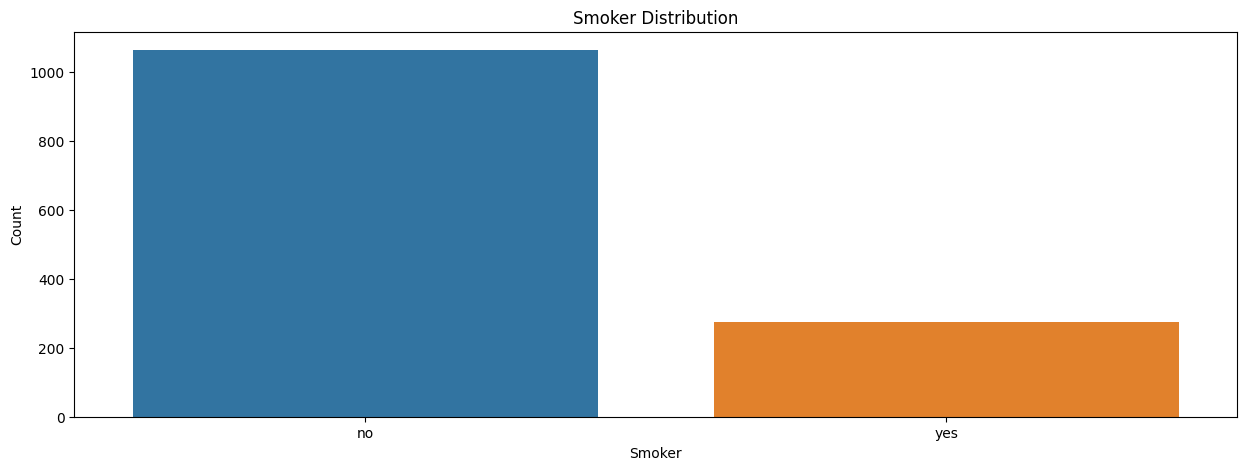

In [14]:
#Smoker Distribution
plot_distribution('smoker', 'Smoker')

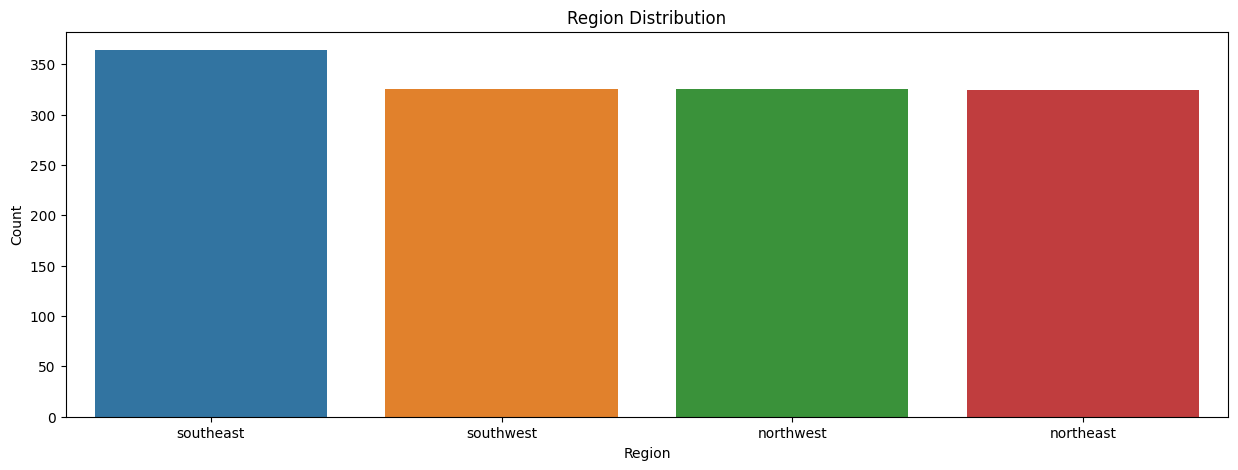

In [15]:
#Region
plot_distribution('region', 'Region')

In [16]:
# Function to calculate average values of features
def calculate_averages(data, features):
    averages = data[features].mean(numeric_only=True)
    print("Average Values of Features:")
    for feature, avg in zip(features, averages):
        print(f"{feature}: {avg:.2f}")

# Calculate and print average values
features = ['age', 'bmi', 'children']
calculate_averages(X, features)

Average Values of Features:
age: 39.21
bmi: 30.67
children: 1.09


In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_y_pred = lin_reg.predict(X_test)

## Regression Models

In [30]:
# Polynomial Regression
results = {}  # Initialize results dictionary

def build_and_evaluate_model(model, name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r_squared = r2_score(y_test, predictions) # Compute evaluation metrics: R-squared, MAE, MSE
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    results[name] = {'R-squared': r_squared, 'MAE': mae, 'MSE': mse}

    # Print the evaluation metrics for the model
    print(f"Metrics of {name}:")
    print(f"R-squared: {r_squared}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    return model

# Polynomial Regression Degree
for degree in range(1, 5):
    polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polyreg = build_and_evaluate_model(polyreg, f'Polynomial Regression (Degree {degree})')

# Output the results dictionary
print("\nResults:")
for model, metrics in results.items():
    print(f"{model}: {metrics}")


Metrics of Polynomial Regression (Degree 1):
R-squared: 0.7848639273140425
Mean Absolute Error: 4166.033470149255
Mean Squared Error: 33399602.86349739
Metrics of Polynomial Regression (Degree 2):
R-squared: 0.8668042399268143
Mean Absolute Error: 2753.2470522388057
Mean Squared Error: 20678473.089169033
Metrics of Polynomial Regression (Degree 3):
R-squared: 0.8332534959101962
Mean Absolute Error: 3210.74197761194
Mean Squared Error: 25887183.613348134
Metrics of Polynomial Regression (Degree 4):
R-squared: 0.7645871174685424
Mean Absolute Error: 3655.665708955224
Mean Squared Error: 36547551.916034706

Results:
Polynomial Regression (Degree 1): {'R-squared': 0.7848639273140425, 'MAE': 4166.033470149255, 'MSE': 33399602.86349739}
Polynomial Regression (Degree 2): {'R-squared': 0.8668042399268143, 'MAE': 2753.2470522388057, 'MSE': 20678473.089169033}
Polynomial Regression (Degree 3): {'R-squared': 0.8332534959101962, 'MAE': 3210.74197761194, 'MSE': 25887183.613348134}
Polynomial Regres

In [31]:
# Define dictionary to store results
dtree_results = {}

# Loop over different depths
for depth in range(1, 10):
    dtree = DecisionTreeRegressor(max_depth=depth)
    dtree.fit(X_train, y_train)
    dtree_y_pred = dtree.predict(X_test)

    # Compute evaluation metrics
    dtree_metrics = {
        'R-squared': r2_score(y_test, dtree_y_pred),
        'MAE': mean_absolute_error(y_test, dtree_y_pred),
        'MSE': mean_squared_error(y_test, dtree_y_pred)
    }

    # Store the metrics in the results dictionary
    dtree_results[f"Max Depth {depth}"] = dtree_metrics

# Output the results
for depth, metrics in dtree_results.items():
    print(f"Results for Decision Tree Regression with Max Depth {depth}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Results for Decision Tree Regression with Max Depth Max Depth 1:
R-squared: 0.6602486700506884
MAE: 5625.810669047807
MSE: 52745963.75669898

Results for Decision Tree Regression with Max Depth Max Depth 2:
R-squared: 0.8320641170379122
MAE: 3299.973011999973
MSE: 26071833.177191876

Results for Decision Tree Regression with Max Depth Max Depth 3:
R-squared: 0.8530572857587291
MAE: 2865.6377338357
MSE: 22812670.316367526

Results for Decision Tree Regression with Max Depth Max Depth 4:
R-squared: 0.864238671935167
MAE: 2698.974282641308
MSE: 21076774.27116283

Results for Decision Tree Regression with Max Depth Max Depth 5:
R-squared: 0.8436857830835047
MAE: 2848.0930913130596
MSE: 24267584.239815433

Results for Decision Tree Regression with Max Depth Max Depth 6:
R-squared: 0.8188563103324091
MAE: 2878.8532582545645
MSE: 28122328.44353238

Results for Decision Tree Regression with Max Depth Max Depth 7:
R-squared: 0.7895020771606195
MAE: 2919.8528400788
MSE: 32679535.97298017

Result

In [32]:
# # K-Nearest Neighbors Regression
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
knn_y_pred = knn_regressor.predict(X_test)

# Compute evaluation metrics
knn_metrics = {
    'R-squared': r2_score(y_test, knn_y_pred),
    'MAE': mean_absolute_error(y_test, knn_y_pred),
    'MSE': mean_squared_error(y_test, knn_y_pred)
}

# Store the metrics in the results dictionary
results['K-Nearest Neighbors'] = knn_metrics

# Output the results
print("Results for K-Nearest Neighbors Regression:")
for metric, value in knn_metrics.items():
    print(f"{metric}: {value}")

Results for K-Nearest Neighbors Regression:
R-squared: 0.7684531431989069
MAE: 3630.8050671641786
MSE: 35947356.31683957


In [24]:
# # Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_y_pred = rf_reg.predict(X_test)

# Compute evaluation metrics
rf_metrics = {
    'R-squared': r2_score(y_test, rf_y_pred),
    'MAE': mean_absolute_error(y_test, rf_y_pred),
    'MSE': mean_squared_error(y_test, rf_y_pred)
}

# Store the metrics in the results dictionary
results['Random Forest'] = rf_metrics

# Output the results
print("Results for Random Forest Regression:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value}")

Results for Random Forest Regression:
R-squared: 0.8622038902548423
MAE: 2562.444117089553
MSE: 21392671.550444156


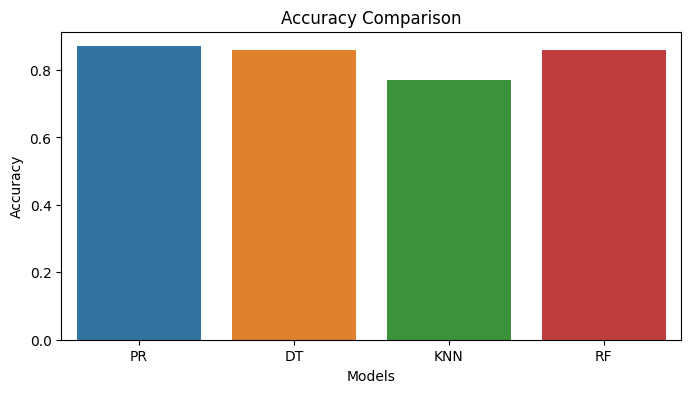

In [34]:
# # Visualize R-squared values of all models
# Replace with actual model accuracy if required
model_accuracy = {
    'PR': 0.87,
    'DT': 0.86,
    'KNN': 0.77,
    'RF': 0.86
}

# Plotting the accuracies of specific models
plt.figure(figsize=(8, 4))
sns.barplot(x=list(model_accuracy.keys()), y=list(model_accuracy.values()))
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()
